# Heart Disease Prediction

Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis. The amount of data in the healthcare industry is huge. Data mining turns the large collection of raw healthcare data into information that can help to make informed decisions and predictions.<br>
Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry.<br>
We will be applying several Machine Learning approaches(and eventually comparing them) for classifying whether a person is suffering from heart disease or not, using one of the most used dataset — Cleveland Heart Disease dataset from the UCI Repository.


In [73]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
#read data
data=pd.read_csv("cleaveland.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### The dataset consists of 779 individuals data.There are 14 columns.

 1.*Age* : displays the age of the individual.<br>
 2.*Sex* : displays the gender of the individual using the following format : <br>
       > 1 = male<br>
       > 0 = female.<br>
 3.*Chest-pain type *: displays the type of chest-pain experienced by the individual using the following format :<br>
        > 1 = typical angina <br>
        > 2 = atypical angina <br>
        > 3 = non - anginal pain <br>
        > 4 = asymptotic<br>
 4.*Resting Blood Pressure *: displays the resting blood pressure value of an individual in mmHg (unit)<br>
 5.*Serum Cholestrol* : displays the serum cholestrol in mg/dl (unit)<br>
 6.*Fasting Blood Sugar *: compares the fasting blood sugar value of an individual with 120mg/dl.<br>
        If fasting blood sugar > 120mg/dl then : <br>
           > 1 (true) else :<br>
           >0 (false)<br>
 7.*Resting ECG *: <br>
        > 0 = normal <br>
        > 1 = having ST-T wave abnormality<br> 
        > 2 = left ventricular hyperthrophy<br>
 8.*Max heart rate achieved *: displays the max heart rate achieved by an individual.<br>
 9.*Exercise induced angina* :<br>
        > 1 = yes <br>
        > 0 = no<br>
 10.*ST depression induced by exercise relative to rest *: displays the value which is integer or float.<br>
 11.Peak exercise ST segment : <br>
       > 1 = upsloping <br>
       > 2 = flat <br>
       > 3 = downsloping<br>
 12.*Number of major vessels (0-3) colored by flourosopy *: displays the value as integer or float.<br>
 13.*Thal *: displays the thalassemia : <br>
        > 3 = normal <br>
        > 6 = fixed defect<br> 
        > 7 = reversable defect<br>
 14.*Diagnosis of heart disease* : Displays whether the individual is suffering from heart disease or not :<br>
        > 0 = absence <br>
        > 1,2,3,4 = present.<br>


### Why these parameters:

**Age:**
Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.<br>
**Sex:**
Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.<br>
**Angina (Chest Pain):**
Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.<br>
**Resting Blood Pressure:**
Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.<br>
**Serum Cholesterol:**
A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.<br>
**Fasting Blood Sugar:**
Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.<br>
**Resting ECG:**
For people at low risk of cardiovascular disease, the USPSTF concludes with moderate certainty that the potential harms of screening with resting or exercise ECG equal or exceed the potential benefits. For people at intermediate to high risk, current evidence is insufficient to assess the balance of benefits and harms of screening.<br>
**Max heart rate achieved:** 
The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.<br>
**Exercise induced angina:**
    The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands. o Types of Angina a. Stable Angina / Angina Pectoris b. Unstable Angina c. Variant (Prinzmetal) Angina d. Microvascular Angina.<br>
**Peak exercise ST segment:**
    A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Exercise ECGs with up-sloping ST-segment depressions are typically reported as an ‘equivocal’ test. In general, the occurrence of horizontal or down-sloping ST-segment depression at a lower workload (calculated in METs) or heart rate indicates a worse prognosis and higher likelihood of multi-vessel disease. The duration of ST-segment depression is also important, as prolonged recovery after peak stress is consistent with a positive treadmill ECG stress test. Another finding that is highly indicative of significant CAD is the occurrence of ST-segment elevation > 1 mm (often suggesting transmural ischemia); these patients are frequently referred urgently for coronary angiography.<br>

In [68]:
#data preprocess

data['target'] = data.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data['thal'] = data.thal.fillna(data.thal.mean())
data['ca'] = data.ca.fillna(data.ca.mean())

In [69]:
#Data Visualizatiom
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


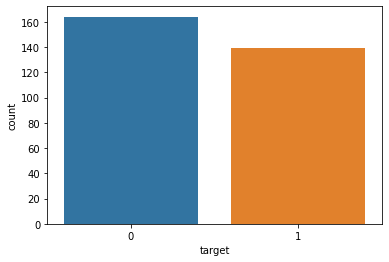

In [70]:
sns.countplot(x="target",data=data)

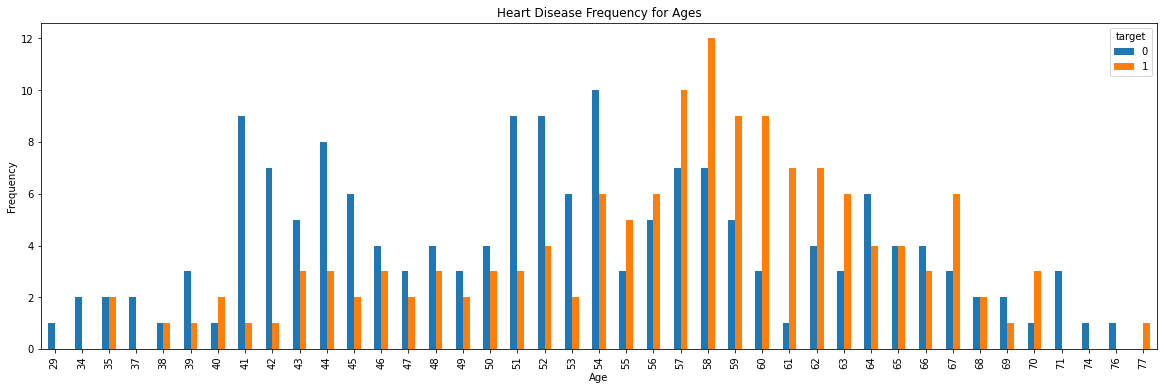

In [71]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

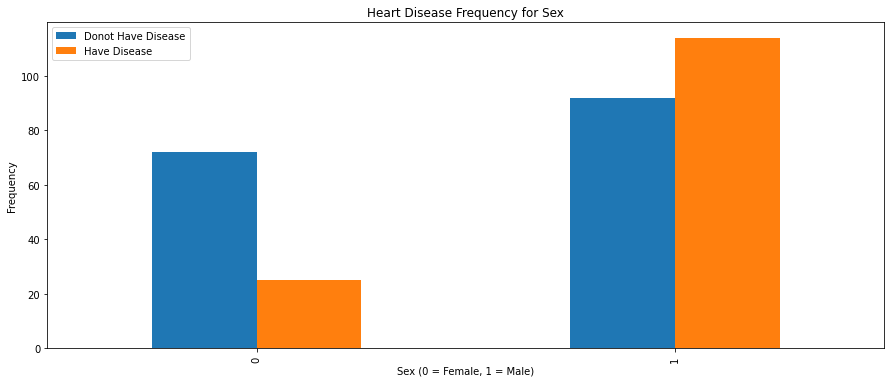

In [72]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Donot Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()